<a href="https://colab.research.google.com/github/OlivierNDO/image_proc/blob/master/Remove_Duplicate_Images_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages

In [1]:
!pip install imagehash

In [2]:
from PIL import Image
import imagehash
import argparse
import hashlib
import shelve
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from skimage import io
from skimage.transform import resize
import skimage
from io import BytesIO
import requests

Define Functions

In [3]:
def read_resize_image(img, img_type = 'file', img_height = 220, img_width = 220):
      """Read image (url or file path) and resize"""
      if img_type == 'url':
          img_load = Image.open(BytesIO(requests.get(img).content))
      elif img_type == 'file':
          img_load = tf.keras.preprocessing.image.load_img(img)
      else:
          print('Error: Attribute img_type must be "url" or "file"')
      resized_img = skimage.transform.resize(np.array(img_load),  (img_height, img_width))
      return np.expand_dims(np.array(resized_img), axis = 0)
  

def get_duplicate_indices(input_list):
  """
  Return indices of duplicated items in a list (for removal)
  Args:
    input_list (list): list from which to identify duplicates
  Returns:
    list
  """
  elements = []
  duplicate_indices = []
  for i, x in enumerate(input_list):
    if x in elements:
      duplicate_indices.append(i)
    elements.append(x)
  return duplicate_indices


def remove_duplicate_arrays(arr, resize_height = 20, resize_width = 20):
  """
  Remove duplicate 3d numpy arrays from 4d image array.
  Resizing to smaller pixel dimensions removes approximate duplicates.
  Args:
    arr (numpy.ndarray): 4d array of images
    resize_height (int): height to resize image. defaults to 20.
    resize_width (int): width to resize image. defaults to 20.
  Returns:
    numpy.ndarray
  """
  hash_list = [hashlib.sha1(arr[i].view(np.uint8)).hexdigest() for i in range(arr.shape[0])]
  duplicate_indices = get_duplicate_indices(hash_list)
  non_duplicate_indices = [i for i in range(arr.shape[0]) if i not in duplicate_indices]
  return arr[non_duplicate_indices]

Read Images and Create Duplicates

In [4]:
image_urls = ['https://www.crismatec.com/python/bl/living-room-gray-color-schemes-ideas-grey-sitting_living-room-layout-and-decor-701x451.jpg',
              'https://secure.img1-fg.wfcdn.com/im/90006185/resize-h800%5Ecompr-r85/4886/48867205/Javion+3+Piece+Living+Room+Set.jpg']
image_arrays = np.vstack([read_resize_image(img = x, img_type = 'url') for x in image_urls])
image_arrays = np.vstack([image_arrays, image_arrays])

Plot Images Before Removing Duplicates

Printing image 0 of 4


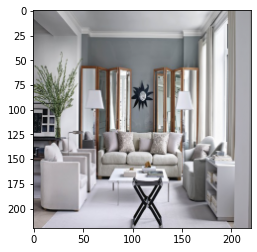

Printing image 1 of 4


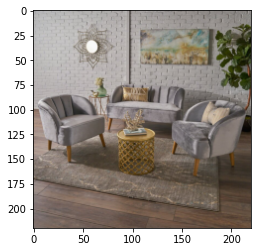

Printing image 2 of 4


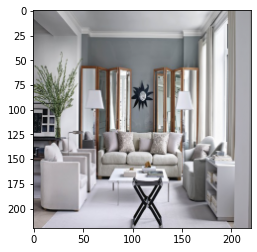

Printing image 3 of 4


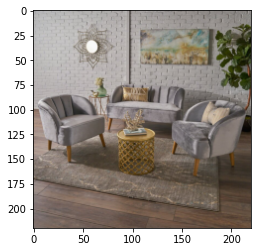

In [5]:
for i in range(image_arrays.shape[0]):
  print(f'Printing image {i} of {image_arrays.shape[0]}')
  plt.figure()
  plt.imshow(image_arrays[i])
  plt.show()

Remove Duplicates with Hashing and Re-Plot

Printing image 0 of 2


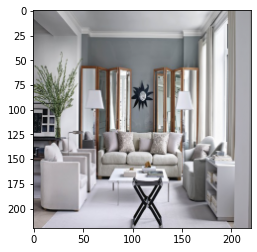

Printing image 1 of 2


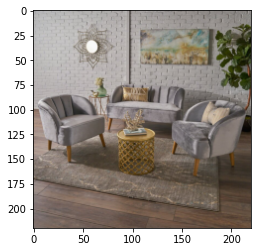

In [6]:
deduped_array = remove_duplicate_arrays(image_arrays)

for i in range(deduped_array.shape[0]):
  print(f'Printing image {i} of {deduped_array.shape[0]}')
  plt.figure()
  plt.imshow(deduped_array[i])
  plt.show()